In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('zb.csv', encoding='utf-8')
gz = data.values[:, 0].reshape(-1, 1).astype(float)
X = np.expand_dims(data.values[:, 1:].astype(float), axis=2)

In [15]:
data = pd.read_csv('g2train1.csv')
Ethanol = data.values[:, 4].reshape(-1, 1).astype(float)
Phosphate = data.values[:, 5].reshape(-1, 1)
Acetate = data.values[:, 6].reshape(-1, 1)
lactate = data.values[:, 7].reshape(-1, 1)
BDO = data.values[:, 8].reshape(-1, 1)
X = np.expand_dims(data.values[:, 10:].astype(float), axis=2)
time = np.array(data.iloc[:, 0]).reshape(-1, 1)

In [7]:
data = pd.read_csv('g1train.csv', encoding='utf-8')



"""
Ethanol = data.values[:, 2].reshape(-1, 1).astype(float)
Phosphate = data.values[:, 3].reshape(-1, 1).astype(float)
Acetate = data.values[:, 4].reshape(-1, 1).astype(float)
BDO = data.values[:, 5].reshape(-1, 1).astype(float)
X = np.expand_dims(data.values[:, 10:].astype(float), axis=2)
"""


In [5]:
'''
# 类别向量转换为独热编码
from keras.utils import np_utils
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)
Y_onehot = np_utils.to_categorical(Y_encoded) # 转换成矩阵
'''


d:\ANACONDA\envs\TF\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
X.shape

(2466, 1024)

In [16]:
# 划分训练集，测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Ethanol, test_size=0.2, random_state=0)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv1D,MaxPooling1D,Flatten,Dropout,LeakyReLU,LSTM
from keras.utils.vis_utils import plot_model
import keras
from keras import layers


In [17]:
X_train.shape[0]

1972

In [20]:
# 定义神经网络
def baseline_model():

    model = keras.Sequential()
    #model.add(Dense(1024, input_shape=[1024])),
    model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]))),
    #model.add(LeakyReLU(0.2))
    #model.add(Dense(64)),
    #model.add(LeakyReLU(0.2))
    model.add(Dense(1))
    #model.add(Dense(1, activation='softmax'))
    #plot_model(model, to_file='./model_classifier.png', show_shapes=True) # 保存网络结构为图片，这一步可以直接去掉
    #print(model.summary()) # 显示网络结构
    optimizer = tf.keras.optimizers.RMSprop(0.99)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    #model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model


In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
# 训练回归器
estimator = KerasRegressor(build_fn=baseline_model, epochs=3, batch_size=1, verbose=0)
estimator.fit(X_train, Y_train)
yt = Y_test
yp = estimator.predict(X_test) 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
print(f"均方误差(MSE):{mean_squared_error(yp, yt)}")
print(f"根均方误差(RMSE):{np.sqrt(mean_squared_error(yp, yt))}")
print(f"测试集R^2:{r2_score(yt, yp)}")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25924\418772456.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, epochs=3, batch_size=1, verbose=0)


均方误差(MSE):9.53820609275818
根均方误差(RMSE):3.088398629186035
测试集R^2:-44.76612186007186


In [64]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print(epoch, end='')

EPOCHS = 500

history = estimator.fit(
  X_train, Y_train,
  epochs=EPOCHS, validation_split = 1, verbose=0,
  callbacks=[PrintDot()])


0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199
200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299
30030130230330430530630730830931031131231331431531631731831932032132232332432532632732832933033133233333433533633733833934034134234334434534634734834935035135235335435535635735835936036136236336436536636736

In [65]:
estimator.predict(X_test)


array([335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7224,
       335.7224, 335.7224, 335.7224, 335.7224, 335.7224, 335.7

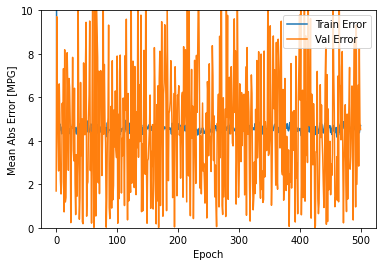

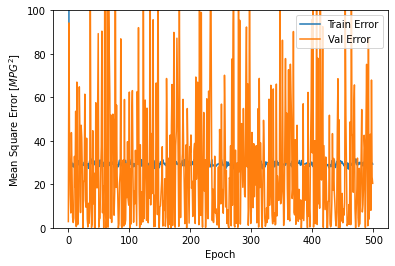

In [67]:
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0, 10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()


plot_history(history)



0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899
100101102103

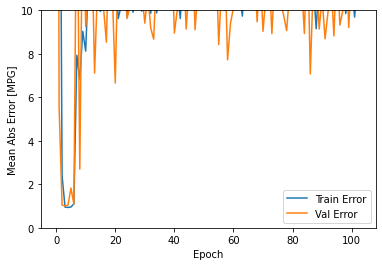

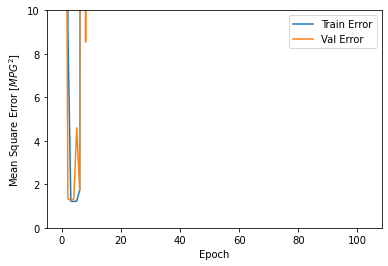

In [61]:
model = baseline_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, Y_train, epochs=EPOCHS,
                    validation_split = 0.1, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [60]:
yt = Y_test
yp = history.predict(X_test) 


AttributeError: 'History' object has no attribute 'predict'

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
print(f"均方误差(MSE):{mean_squared_error(yp, yt)}")
print(f"根均方误差(RMSE):{np.sqrt(mean_squared_error(yp, yt))}")
print(f"测试集R^2:{r2_score(yt, yp)}")


均方误差(MSE):2.9583413589952725
根均方误差(RMSE):1.7199829531118245
测试集R^2:-0.8953518586174853


In [23]:
yp

array([332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 332.22217, 332.22217,
       332.22217, 332.22217, 332.22217, 332.22217, 

In [24]:
yt

array([[329.6],
       [330.6],
       [329.4],
       [330.7],
       [329.2],
       [331.2],
       [329.9],
       [332.4],
       [329.5],
       [331.4],
       [328.9],
       [329.1],
       [330.4],
       [332.3],
       [329.5],
       [331.2],
       [329.7],
       [332.2],
       [330.8],
       [329.9],
       [331.7],
       [328.8],
       [329.5],
       [330. ],
       [330. ],
       [330.3],
       [329.2],
       [330.1],
       [328.8],
       [329. ],
       [329.9],
       [328.9],
       [331.7],
       [330. ],
       [330.9],
       [331.8],
       [330.5],
       [331.8],
       [330.2],
       [330.3],
       [329.6],
       [329.3],
       [328.9],
       [329.4],
       [324.5],
       [328.7],
       [329.1],
       [330.3],
       [330.2],
       [330.5],
       [329. ],
       [328.9],
       [329.9],
       [332.2],
       [331.3],
       [328.7],
       [330.4],
       [331.8],
       [331.3],
       [331.3],
       [332.1],
       [328.6],
       [

In [ ]:

'''from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=1, verbose=1)
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(estimator, X, Y_onehot, cv = kfold)
print('Baseline: %.2f (%.2f) MSE' % (results.mean(), results.std()))'''


In [55]:
# 将其模型转换为json
model_json = estimator.model.to_json()
with open(r".\Rmodel.json",'w')as json_file:
    json_file.write(model_json)# 权重不在json中,只保存网络结构
estimator.model.save_weights('Rmodel.h5')

In [56]:
# 加载模型用做预测
from keras.models import model_from_json
json_file = open(r".\Rmodel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("Rmodel.h5")


In [60]:
Y_test

array([[18.407],
       [17.981],
       [18.05 ],
       [18.05 ],
       [18.407],
       [17.981],
       [18.05 ],
       [17.981],
       [17.89 ],
       [17.89 ],
       [17.682],
       [17.385],
       [ 3.966],
       [18.03 ],
       [17.89 ],
       [17.89 ],
       [18.05 ],
       [18.24 ],
       [18.03 ],
       [17.89 ],
       [17.981],
       [18.24 ],
       [17.89 ],
       [18.03 ],
       [18.05 ],
       [17.385],
       [18.407],
       [17.682],
       [18.407],
       [18.03 ],
       [18.407],
       [17.89 ],
       [17.385],
       [17.981],
       [18.24 ],
       [18.05 ],
       [18.05 ],
       [18.24 ],
       [17.385],
       [17.89 ],
       [17.385],
       [17.981],
       [17.981],
       [18.24 ],
       [17.89 ],
       [18.407],
       [17.89 ],
       [18.24 ],
       [17.89 ],
       [17.385],
       [17.682],
       [18.03 ],
       [18.407],
       [17.385],
       [17.89 ],
       [17.981],
       [17.385],
       [17.682],
       [18.24 

In [58]:
print(loaded_model.predict(X_test))

9/9 [==============================] - 0s 9ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

In [57]:
print("loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 分类准确率
print("The accuracy of the classification model:")
scores = loaded_model.evaluate(X_test, Y_test, verbose=0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], scores[1] * 100))
# 输出预测类别
predicted = loaded_model.predict(X_test)
predicted_label = np.argmax(predicted, axis = 1)
print("predicted label:\n " + str(predicted_label))

loaded model from disk
The accuracy of the classification model:
accuracy: 0.00%
9/9 [==============================] - 0s 5ms/step
predicted label:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [26]:
labels = ['0', '1', '2']

In [94]:
predicted_label

array([0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0])

In [97]:
np.array(to_label(y_pred))-predicted_label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [90]:
y_true = predicted_label
y_pred = Y_test

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [77]:
def to_label(x):
    a = []
    for i in range(x.shape[0]):
        a = np.append(a, x[i].tolist().index(1))
    return a

[[1.   0.   0.  ]
 [0.11 0.89 0.  ]
 [0.   0.29 0.71]]


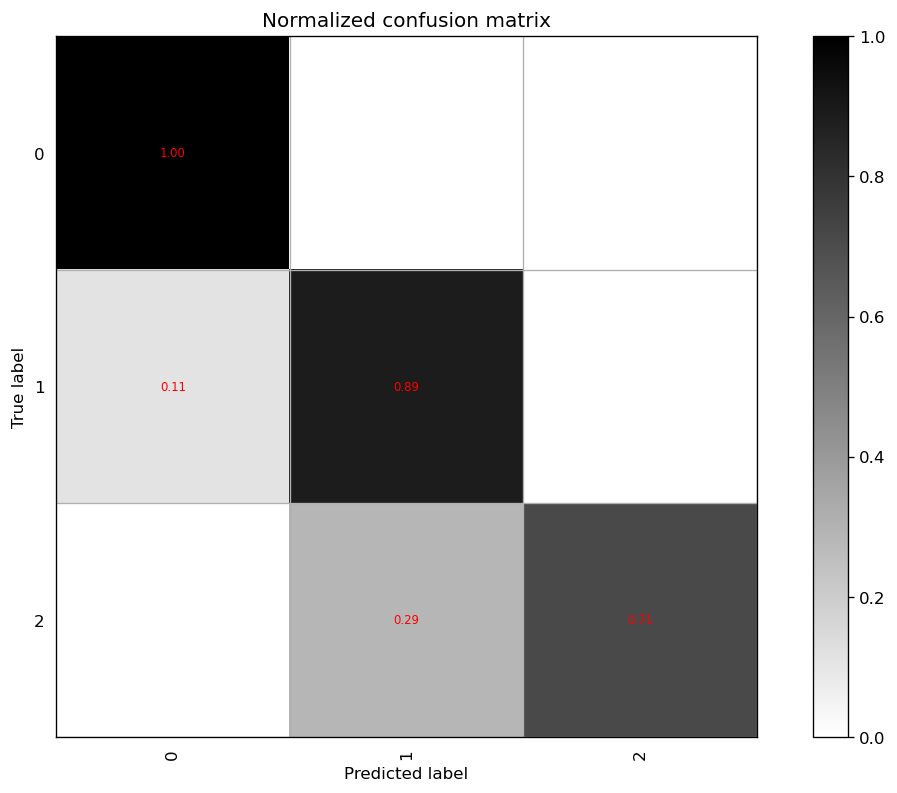

In [93]:
cm = confusion_matrix(y_true, np.array(to_label(y_pred)))
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('.confusion_matrix.png', format='png')
plt.show()


接下来，利用Boston数据集进行KerasRegressior使用

In [37]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 
# 导入数据
dataset = datasets.load_boston()
 
x = dataset.data
Y = dataset.target
 
# 设定随机种子
seed = 7
np.random.seed(seed)

In [1]:
Y

NameError: name 'Y' is not defined

In [ ]:
# 构建模型函数
def creat_model(units_list=[13],optimizer='adam',init='normal'):
    # 构建模型
    model = Sequential()
    
    # 构建第一个隐藏层和输入层
    units = units_list[0]
    model.add(Dense(units=units,activation = 'relu',input_dim=13,kernel_initializer = init))
    # 构建更多隐藏层
    for units in units_list[1]:
        model.add(Dense(units=units,activation='relu', kernel_initializer = init))
        
    # 构建输出层，由于回归问题不需要对预测结果进行分类，因此不需要激活函数
    model.add(Dense(units=1,kernel_initializer = init))
    
    # 编译函数,指定用于评估一组权重的损失函数loss（回归问题一般用均方误差MSE）、用于搜索网络不同权重的优化器optimizer
    model.compile(loss='mean_squared_error',optimizer = optimizer)
    
    return model 